# Separable JSA for photon triplets

# Ideal case for waveguides

## Conditions: phase-matching, group-velocity matching, $\beta_F\gg\beta_P$

### Minimal working example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import savemat
from matplotlib.ticker import FormatStrFormatter

**Phase-mismatch Taylor expansion**

$$
\frac{\ell}{2} \Delta k\left(\delta\omega_1,\delta\omega_2,\delta\omega_3\right)=\tau_1 \left(\delta\omega_1+\delta\omega_2+\delta\omega_3\right)+\tau_P^2\left(\delta\omega_1+\delta\omega_2+\delta\omega_3\right)^2-\tau_F^2\left(\delta\omega_1^2+\delta\omega_2^2+\delta\omega_3^2\right),$$

where 

$$\tau_1=\frac{L}{2}\left(\frac{1}{v_{g_{P}}}-\frac{1}{v_{g_{F}}}\right),~\tau_P^2=\frac{L}{4}\beta_{2_P},~\tau_F^2=\frac{L}{4}\beta_{2_F}.$$

**Phase-mismatch expansion in scaled units**

Defining scaled frequencies $w_1,~w_2,~w_3~=~\tau_F~\delta\omega_1,~\tau_F~\delta\omega_2,~\tau_F~\delta\omega_3$, we have

$$\frac{\ell}{2} \Delta k\left(w_1,~w_2,~w_3\right)=\frac{\tau_1}{\tau_F} \left(w_1+~w_2+~w_3\right)+\frac{\tau_P^2}{\tau_F^2}\left(w_1+~w_2+~w_3\right)^2-\left(w_1^2+w_2^2+w_3^2\right),$$

**Pump envelope function in scaled units**

Defining a gaussian pump:

$$\alpha \left(\delta\omega_1,\delta\omega_2,\delta\omega_3\right)= \exp \left(-\frac{1}{2}T^2\left(\delta\omega_1+\delta\omega_2+\delta\omega_3\right)^2\right)$$

We can now write it in scaled units as

$$\alpha \left(w_1,~w_2,~w_3\right)= \exp \left(-\frac{1}{2}\frac{T^2}{\tau_F^2}\left(w_1+w_2+w_3\right)^2\right)$$

In [2]:
#Wavevector expansion: Phase mismatch calculation
def ldelk(tau1, taup,tauf,w1,w2,w3): 
    ldelk=(tau1/tauf)*(w1+w2+w3)+((taup**2)/(tauf**2))*(w1*w2+w2*w3+w1*w3)+(w1**2+w2**2+w3**2)
    return ldelk

In [3]:
#JSA-Using the Taylor expansion of the wavevector
def JSAD(tau1, taup,tauf,w1,w2,w3,T0):
    jsad=np.sinc((1/(np.pi))*(ldelk(tau1, taup,tauf,w1,w2,w3)))*np.exp(-(1/2)*(T0**2/tauf**2)*((w1+w2+w3))**2)
    return jsad

#### Convergence test

In [4]:
#Conditions
tau11=0  # Group-velocity matching
taup1=0  # \beta_P << \beta_F -->\beta_P negligible in comparison to \beta_F
tauf1=1  # \beta_F >> \beta_P
sigmapm=np.sqrt(np.pi)/tauf1 # Approximate HWHM of the phase-matching function, measured in terms of the sinc's main lobe width
T01=1/sigmapm # Matching the phase-matching bandwidth

In [5]:
# Spectral resolution
delw=sigmapm/30 # The spectral resolution is defined such that a minimum of 30 discrete points are sampled within each frequency vector over the bandwidth of the phase-matching function, regardless of the specific width of the evaluation function.

In [6]:
w_min=1 # Minimum spectral width 
w_max=30 # Maximum spectral width
npts=50
w_width=np.linspace(w_min,w_max,npts)
print(np.arange(-w_max,w_max+delw,delw).size) # Always check the max size to be aware of the memory usage

1017


In [7]:
volume_vec=np.zeros_like(w_width)
for i,w in enumerate(w_width):
    omf=np.arange(-w,w+delw,delw)
    JSA_3D=JSAD(tau11,taup1,tauf1,omf[:,None,None],omf[None,:,None],omf[None,None,:],T01) 
    volume_vec[i]=np.sum(JSA_3D**2)*(omf[1]-omf[0])**3
    print(i,w_width[i],volume_vec[i])
    del JSA_3D

0 1.0 4.605277976015593
1 1.5918367346938775 5.903286499259737
2 2.183673469387755 6.252485521482552
3 2.7755102040816326 6.398579867619844
4 3.36734693877551 6.474786467391743
5 3.9591836734693877 6.5209764100483065
6 4.551020408163265 6.548370170997972
7 5.142857142857142 6.566758700232998
8 5.73469387755102 6.579694871021924
9 6.326530612244898 6.5891471311549115
10 6.918367346938775 6.596260443475801
11 7.5102040816326525 6.601749546954433
12 8.10204081632653 6.606075989496533
13 8.693877551020408 6.609546381736771
14 9.285714285714285 6.612372361542321
15 9.877551020408163 6.614704938105005
16 10.46938775510204 6.616652308108142
17 11.061224489795919 6.618295290411067
18 11.653061224489797 6.619694136375446
19 12.244897959183673 6.620894936361597
20 12.83673469387755 6.621933454202737
21 13.428571428571429 6.622837687474691
22 14.020408163265305 6.62362990205578
23 14.612244897959183 6.624327791932494
24 15.204081632653061 6.62494583678477
25 15.795918367346939 6.625495727088441
2

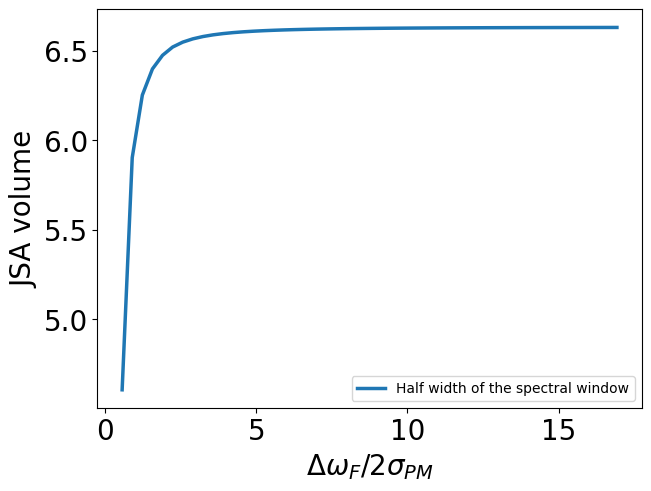

In [25]:
fig1, axs1 = plt.subplots(1, 1, sharex=True, sharey=True, constrained_layout=True)


plt.plot(w_width/sigmapm,volume_vec,label='Half width of the spectral window',linewidth=2.5)
plt.xlabel(r'$\Delta \omega_F/2\sigma_{PM}$') 
plt.ylabel("JSA volume") 
# plt.xlim(omf[0]/np.sqrt(np.pi),omf[-1]/np.sqrt(np.pi))
  
plt.legend(prop={'size':10})

# plt.savefig("Figures_export/Weighted_modes_ideal.pdf", format="pdf", bbox_inches="tight")
plt.show()

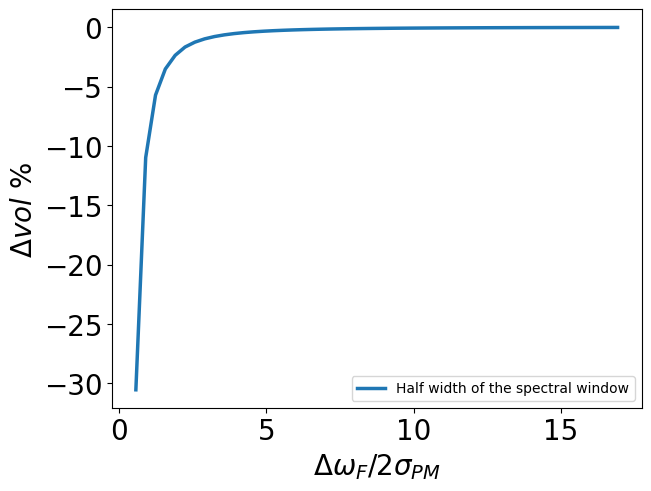

In [23]:
fig2, axs2 = plt.subplots(1, 1, sharex=True, sharey=True, constrained_layout=True)


plt.plot(w_width/sigmapm,((volume_vec-volume_vec[-1])/(volume_vec[-1]))*100,label='Half width of the spectral window',linewidth=2.5)
plt.xlabel(r'$\Delta \omega_F/2 \sigma_{PM}$') 
plt.ylabel("$\Delta vol~\%$ ") 
# plt.xlim(omf[0]/np.sqrt(np.pi),omf[-1]/np.sqrt(np.pi))
  
plt.legend(prop={'size':10})

# plt.savefig("Figures_export/Weighted_modes_ideal.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Data export

In [8]:
volumedict={
    "tag":"Ideal case- Convergence",
    "spectral_width":w_width,
    "jsa_volume":volume_vec
}
savemat("Data_export/Ideal_case_convergence.mat",volumedict)
